In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=a6bc414c5e6e84f5357bfbddee0e0c8e7551ec25638785c2e086062ebfb30bce
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
quality=ctrl.Antecedent(np.arange(0,11,1),'quality')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(0,26,1),'tip')

In [4]:
quality.automf(3)
service.automf(3)

In [5]:
tip['low']=fuzz.trimf(tip.universe,[0,0,13])
tip['midium']=fuzz.trimf(tip.universe,[0,13,25])
tip['high']=fuzz.trimf(tip.universe,[13,25,25])

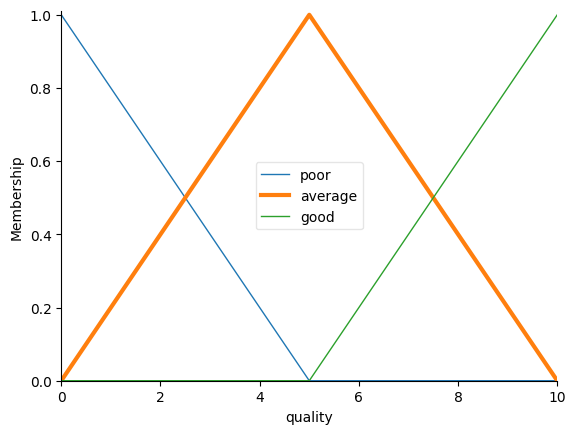

In [6]:
quality['average'].view()

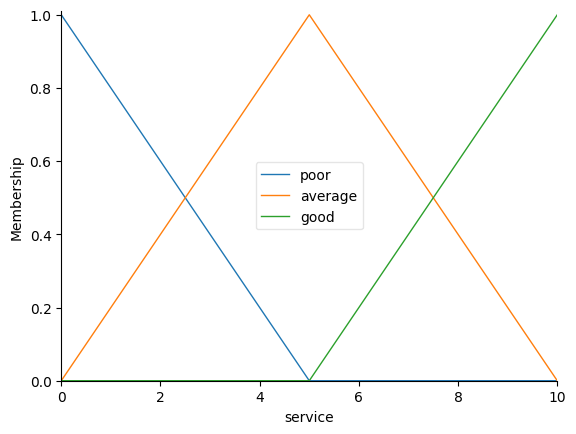

In [7]:
service.view()

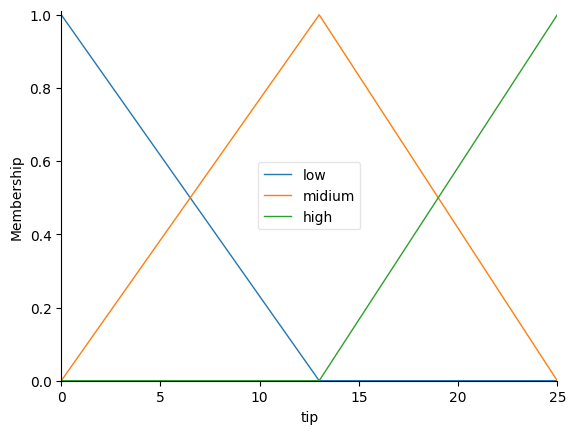

In [8]:
tip.view()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

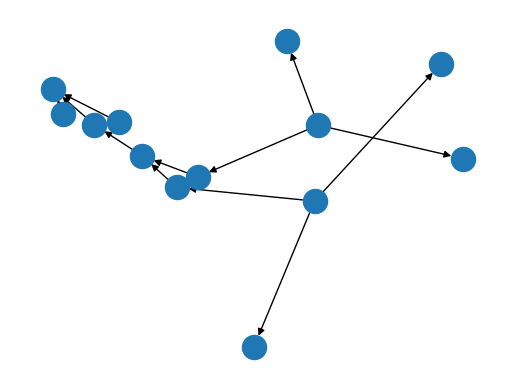

In [9]:
rule1=ctrl.Rule(quality['poor']& service['poor'],tip['low'])
rule1.view()

In [11]:
rule2=ctrl.Rule(quality['average']& service['average'],tip['midium'])


(<Figure size 640x480 with 1 Axes>, <Axes: >)

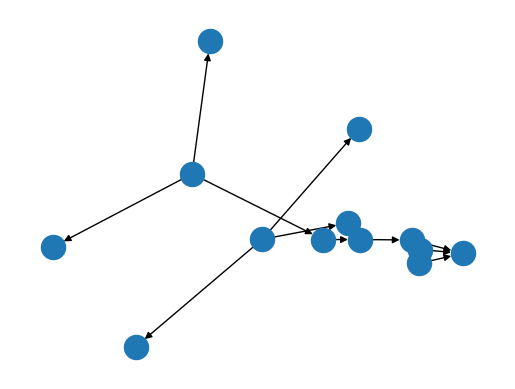

In [12]:
rule2.view()

In [13]:
rule3=ctrl.Rule(quality['good']& service['good'],tip['midium'])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

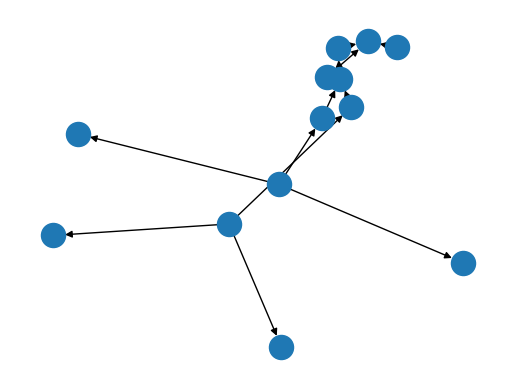

In [14]:
rule3.view()

In [15]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)

In [16]:
tipping.input['quality']=6.5
tipping.input['service']=9.8
tipping.compute()

In [ ]:
print(tipping.output['tip'])

12.570588235294126


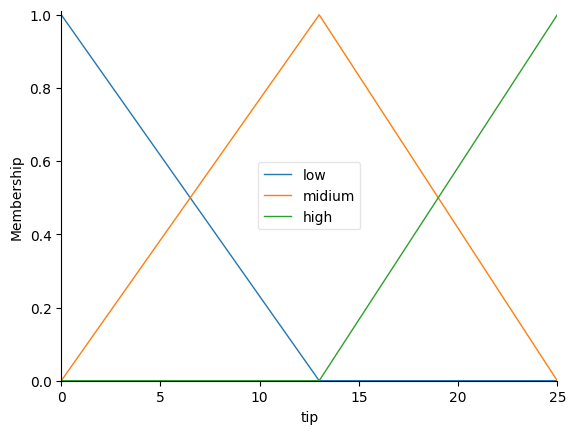

In [17]:
tip.view(Sim=tipping)